# Image Classification

## `01` Import & Download Libs

In [23]:
!pip install -Uq tensorflow numpy matplotlib seaborn

In [24]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Dense, Flatten, Input, Lambda
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3, VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import numpy as np
from glob import glob

import matplotlib.pyplot as plt

## `02` Load dataset

In [25]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

## `03` Display dataset

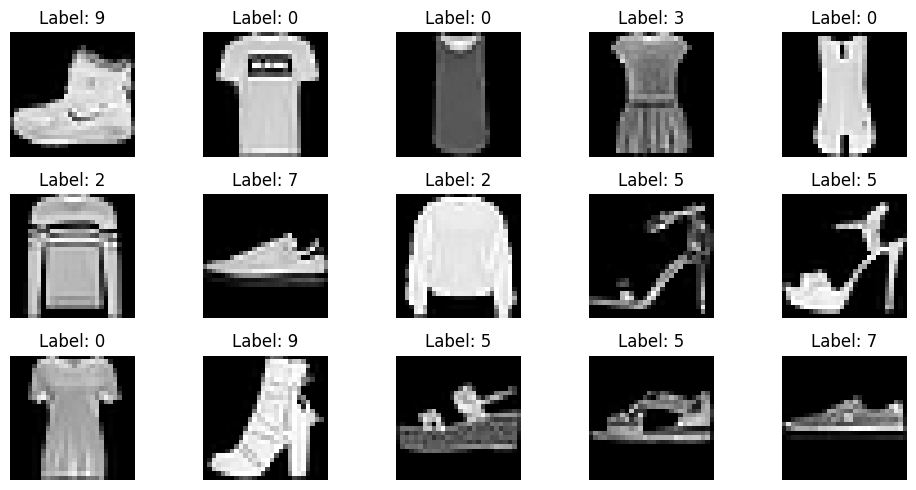

In [26]:
plt.figure(figsize=(10, 5))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [27]:
# display the shapes of the x and y datasets
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape})")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")

x_train shape: (60000, 28, 28), y_train shape: (60000,))
x_test shape: (10000, 28, 28), y_test shape: (10000,)


In [ ]:
import numpy as np
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.image import resize

# Resize and convert grayscale images to 3 channels
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np

# Resize images to 224x224
x_train_resized = np.array([np.repeat(np.expand_dims(img, axis=-1), 3, axis=-1) for img in x_train])
x_test_resized = np.array([np.repeat(np.expand_dims(img, axis=-1), 3, axis=-1) for img in x_test])

# Optionally, resize images to (224, 224)
from tensorflow.keras.preprocessing.image import smart_resize

x_train_resized = np.array([smart_resize(img, (224, 224)) for img in x_train_resized])
x_test_resized = np.array([smart_resize(img, (224, 224)) for img in x_test_resized])


print(f"x_train_preprocessed shape: {x_train_resized.shape}, y_train shape: {y_train.shape})")


## `04` Load pre-trained Models

In [ ]:
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
vgg19 = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
inceptionv3 = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

E0000 00:00:1754680323.224411   46734 cuda_executor.cc:1228] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1754680323.276510   46734 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 184s 2us/step
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 148s 2us/step
